<a href="https://colab.research.google.com/github/NilanjanChattopadhyay/miscellaneous-DL-experiments/blob/master/Notebooks/Image-Segmentation-UNet-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Oct 19 01:16:55 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    23W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os
os.chdir('/content/gdrive/My Drive/competitions/AIRA')
os.getcwd(), os.listdir()

('/content/gdrive/My Drive/competitions/AIRA',
 ['Images', 'models', 'Predictions', 'Data_1'])

In [ ]:
import glob
Image_List = glob.glob('/content/gdrive/My Drive/competitions/AIRA/Images/*.jpg')
Annotation_List = glob.glob('/content/gdrive/My Drive/competitions/AIRA/Images/*.png')
Image_List, Annotation_List

(['/content/gdrive/My Drive/competitions/AIRA/Images/1.jpg',
  '/content/gdrive/My Drive/competitions/AIRA/Images/2.jpg',
  '/content/gdrive/My Drive/competitions/AIRA/Images/3.jpg',
  '/content/gdrive/My Drive/competitions/AIRA/Images/4.jpg',
  '/content/gdrive/My Drive/competitions/AIRA/Images/5.jpg',
  '/content/gdrive/My Drive/competitions/AIRA/Images/6.jpg'],
 ['/content/gdrive/My Drive/competitions/AIRA/Images/1_label.png',
  '/content/gdrive/My Drive/competitions/AIRA/Images/2_label.png',
  '/content/gdrive/My Drive/competitions/AIRA/Images/3_label.png',
  '/content/gdrive/My Drive/competitions/AIRA/Images/4_label.png',
  '/content/gdrive/My Drive/competitions/AIRA/Images/5_label.png',
  '/content/gdrive/My Drive/competitions/AIRA/Images/6_label.png'])

In [ ]:
import cv2
import matplotlib.pyplot as plt

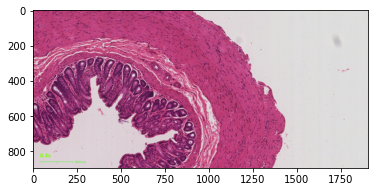

In [ ]:
Image_1 = cv2.imread('/content/gdrive/My Drive/competitions/AIRA/Images/1.jpg')
Image_1 = cv2.cvtColor(Image_1, cv2.COLOR_BGR2RGB)
plt.imshow(Image_1)

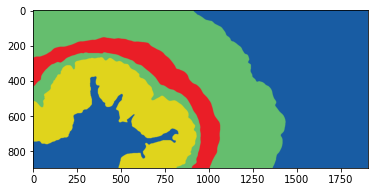

In [ ]:
Annotation_1 = cv2.imread('/content/gdrive/My Drive/competitions/AIRA/Images/1_label.png')
Annotation_1 = cv2.cvtColor(Annotation_1, cv2.COLOR_BGR2RGB)
plt.imshow(Annotation_1)

In [ ]:
Annotation_1 = cv2.imread('/content/gdrive/My Drive/competitions/AIRA/Images/1_label.png')
np.unique(Annotation_1[:,:,0]), np.unique(Annotation_1[:,:,1]), np.unique(Annotation_1[:,:,2])

(array([ 28,  39, 110, 163], dtype=uint8),
 array([ 30,  92, 190, 212], dtype=uint8),
 array([ 24, 101, 224, 234], dtype=uint8))

In [ ]:
np.unique(Annotation_1[0,0,:]), np.unique(Annotation_1[400,0,:]), np.unique(Annotation_1[600,0,:]), np.unique(Annotation_1[800,0,:])

(array([101, 110, 190], dtype=uint8),
 array([ 30,  39, 234], dtype=uint8),
 array([ 28, 212, 224], dtype=uint8),
 array([ 24,  92, 163], dtype=uint8))

## Divide each image into 112 images with 50% overlaps

Total Images = 6*112 = 672

In [ ]:
import shutil
shutil.rmtree('/content/gdrive/My Drive/competitions/AIRA/Data_1')

os.mkdir('/content/gdrive/My Drive/competitions/AIRA/Data_1')
os.mkdir('/content/gdrive/My Drive/competitions/AIRA/Data_1/Images')
os.mkdir('/content/gdrive/My Drive/competitions/AIRA/Data_1/Masks')

for k in range(6):
  print('/content/gdrive/My Drive/competitions/AIRA/Images/'+str(k+1)+'.jpg')
  Image_1 = cv2.imread('/content/gdrive/My Drive/competitions/AIRA/Images/'+str(k+1)+'.jpg')
  Annotation_1 = cv2.imread('/content/gdrive/My Drive/competitions/AIRA/Images/'+str(k+1)+'_label.png')

  Annotation_1[:,:,1] = Annotation_1[:,:,0]
  Annotation_1[:,:,2] = Annotation_1[:,:,0]

  Annotation_1[Annotation_1 == 28] = 0
  Annotation_1[Annotation_1 == 39] = 1
  Annotation_1[Annotation_1 == 110] = 2
  Annotation_1[Annotation_1 == 163] = 3

  print(Image_1.shape)
  print(Annotation_1.shape)

  for i in range(7):
    for j in range(16):
      Temp_Image = Image_1[112*i:112*(i+2), 112*j:112*(j+2)]
      cv2.imwrite('/content/gdrive/My Drive/competitions/AIRA/Data_1/Images/'+str(k+1)+'_'+str(i)+'_'+str(j)+'.png', Temp_Image)
      _ = cv2.imread('/content/gdrive/My Drive/competitions/AIRA/Data_1/Images/'+str(k+1)+'_'+str(i)+'_'+str(j)+'.png')
      assert np.sum(_ != Temp_Image) == 0
      Temp_Annotation = Annotation_1[112*i:112*(i+2), 112*j:112*(j+2)]
      cv2.imwrite('/content/gdrive/My Drive/competitions/AIRA/Data_1/Masks/'+str(k+1)+'_'+str(i)+'_'+str(j)+'.png', Temp_Annotation)
      _ = cv2.imread('/content/gdrive/My Drive/competitions/AIRA/Data_1/Masks/'+str(k+1)+'_'+str(i)+'_'+str(j)+'.png')
      assert np.sum(_ != Temp_Annotation) == 0

len(os.listdir('/content/gdrive/My Drive/competitions/AIRA/Data_1/Images')), len(os.listdir('/content/gdrive/My Drive/competitions/AIRA/Data_1/Masks'))

/content/gdrive/My Drive/competitions/AIRA/Images/1.jpg
(896, 1906, 3)
(896, 1906, 3)
/content/gdrive/My Drive/competitions/AIRA/Images/2.jpg
(896, 1906, 3)
(896, 1906, 3)
/content/gdrive/My Drive/competitions/AIRA/Images/3.jpg
(896, 1906, 3)
(896, 1906, 3)
/content/gdrive/My Drive/competitions/AIRA/Images/4.jpg
(896, 1906, 3)
(896, 1906, 3)
/content/gdrive/My Drive/competitions/AIRA/Images/5.jpg
(896, 1906, 3)
(896, 1906, 3)
/content/gdrive/My Drive/competitions/AIRA/Images/6.jpg
(896, 1906, 3)
(896, 1906, 3)


(672, 672)

## Segmentation Approach - UNet

Paper - https://arxiv.org/pdf/1505.04597.pdf

<img src="https://pytorch.org/assets/images/unet_brain_mri.png" alt="Original UNet" width="75%" align="center"/>

Installing the latest version of fastai

Paper - https://arxiv.org/pdf/2002.04688.pdf

In [ ]:
!pip install --upgrade fastai

Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (2.0.16)


In [ ]:
import fastai
from fastai.vision.all import *
fastai.__version__

'2.0.16'

Creating datablock for segmentation

In [ ]:
path = Path('/content/gdrive/My Drive/competitions/AIRA/Data_1')
def get_my_x(fname:Path): return fname
def get_my_y(fname:Path): return str(fname).replace('Images','Masks')

Random 80-20 split can fail as each original image can be from different slide

Validation Strategy - Images from 2.jpg to 6.jpg used for training and all 112 images from 1.jpg is used for creating validation set


In [ ]:
size = 224
bs = 32

tfms = [IntToFloatTensor(),
        Rotate(),
        Flip(),
        Normalize.from_stats(*imagenet_stats)]

db = DataBlock(blocks=(ImageBlock(), MaskBlock()), 
               batch_tfms=tfms,
               item_tfms=[Resize(size, pad_mode=PadMode.Reflection)],
               get_x=get_my_x, get_y=get_my_y, get_items=get_image_files,
               splitter=IndexSplitter([i for i in range(112)]))

dls = db.dataloaders(source=path/'Images', bs=bs)

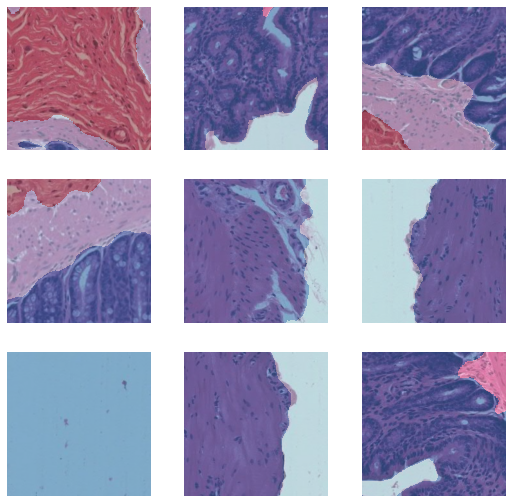

In [ ]:
x,y = dls.one_batch()
dls.show_batch()

Dice Coefficient is the most commonly used segmentation evaluation metric

In [ ]:
def binary_dice(preds, targs, eps=1e-8):
  n = preds.shape[0]
  preds = preds.view(n, -1)*1
  targs = targs.view(n, -1)*1
  intersect = (preds * targs).sum(-1).float() + eps
  union = (preds+targs).sum(-1).float() + 2*eps 
  # usual implementations doesn't multiply with 2
  # not multiplying with 2 can result in inflated dice score as numerator will be multiplied with 2
  return (2. * intersect / union)

def mask_dice_coeff(preds, targs, mask, agg=False):
  pred_mask = preds.argmax(axis=1)
  if agg:
    return binary_dice(pred_mask==mask, targs==mask).mean()
  else:
    return binary_dice(pred_mask==mask, targs==mask)
  
def dice_coeff(preds, targs):
  mask_0 = mask_dice_coeff(preds, targs, 0)
  mask_1 = mask_dice_coeff(preds, targs, 1)
  mask_2 = mask_dice_coeff(preds, targs, 2)
  mask_3 = mask_dice_coeff(preds, targs, 3)
  #equal weight to all masks
  dice_coeff = 0.25*mask_0 + 0.25*mask_1 + 0.25*mask_2 + 0.25*mask_3
  return dice_coeff.mean()

Functions for getting dice coefficents for each mask

In [ ]:
dice_0 = partial(mask_dice_coeff, mask=0, agg=True)
dice_1 = partial(mask_dice_coeff, mask=1, agg=True)
dice_2 = partial(mask_dice_coeff, mask=2, agg=True)
dice_3 = partial(mask_dice_coeff, mask=3, agg=True)

Defining UNet with ResNet34 encoder

<img src="https://miro.medium.com/max/2363/1*eKrh8FqJL3jodebYlielNg.png" width="1200" height="650" alt="UNET with Residual Blocks" title="UNET" align="center"/>

ResNet Paper - https://arxiv.org/pdf/1512.03385.pdf

In [ ]:
learn = unet_learner(dls=dls, arch=fastai.vision.models.resnet34, metrics=[dice_coeff, dice_0, dice_1, dice_2, dice_3], n_out=4)
learn.summary()

DynamicUnet (Input shape: ['32 x 3 x 224 x 224'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               32 x 64 x 112 x 112  9,408      False     
________________________________________________________________
BatchNorm2d          32 x 64 x 112 x 112  128        True      
________________________________________________________________
ReLU                 32 x 64 x 112 x 112  0          False     
________________________________________________________________
MaxPool2d            32 x 64 x 56 x 56    0          False     
________________________________________________________________
Conv2d               32 x 64 x 56 x 56    36,864     False     
________________________________________________________________
BatchNorm2d          32 x 64 x 56 x 56    128        True      
________________________________________________________________
ReLU                 32 x 64 x 56 x 56    0          False     
________________________________________________

SuggestedLRs(lr_min=5.754399462603033e-05, lr_steep=0.0003981071640737355)

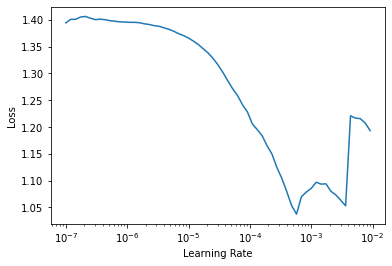

In [ ]:
learn.lr_find()

Training model for 25 epochs

In [ ]:
torch.cuda.empty_cache()
learn.fit_one_cycle(25, 1e-3, cbs=[SaveModelCallback(monitor='dice_coeff', fname="UNET-Resnet34-1")])

epoch,train_loss,valid_loss,dice_coeff,mask_dice_coeff,mask_dice_coeff,mask_dice_coeff,mask_dice_coeff,time
0,0.904419,0.639617,0.386759,0.505156,0.015097,0.511463,0.515319,00:08
1,0.639403,0.216355,0.601601,0.557475,0.463053,0.789817,0.596061,00:08
2,0.509581,0.224670,0.587183,0.552546,0.442048,0.727725,0.626413,00:07
3,0.444133,0.160176,0.619561,0.600880,0.496645,0.744362,0.636355,00:07
4,0.376851,0.238537,0.646994,0.544337,0.577457,0.805025,0.661155,00:07
5,0.326205,0.106101,0.710657,0.694790,0.607618,0.833665,0.706556,00:07
6,0.271314,0.082973,0.744837,0.704671,0.645422,0.831151,0.798103,00:08
7,0.228007,0.084641,0.756246,0.677254,0.756393,0.860072,0.731264,00:07
8,0.197601,0.080426,0.819147,0.742303,0.905156,0.890974,0.738155,00:08
9,0.170676,0.076016,0.812834,0.697792,0.905537,0.889824,0.758182,00:08


Better model found at epoch 0 with dice_coeff value: 0.3867585361003876.
Better model found at epoch 1 with dice_coeff value: 0.6016014218330383.
Better model found at epoch 3 with dice_coeff value: 0.6195606589317322.
Better model found at epoch 4 with dice_coeff value: 0.6469935178756714.
Better model found at epoch 5 with dice_coeff value: 0.7106570601463318.
Better model found at epoch 6 with dice_coeff value: 0.7448369264602661.
Better model found at epoch 7 with dice_coeff value: 0.7562456130981445.
Better model found at epoch 8 with dice_coeff value: 0.8191468119621277.
Better model found at epoch 10 with dice_coeff value: 0.8597803115844727.
Better model found at epoch 12 with dice_coeff value: 0.8969153761863708.
Better model found at epoch 13 with dice_coeff value: 0.9089798331260681.
Better model found at epoch 14 with dice_coeff value: 0.9183322191238403.
Better model found at epoch 19 with dice_coeff value: 0.9318166971206665.
Better model found at epoch 21 with dice_coeff

Training for additional 25 epochs after unfreezing all the layers

In [ ]:
torch.cuda.empty_cache()
learn.load('UNET-Resnet34-1')
learn.unfreeze()
learn.dls.bs = 32
learn.fit_one_cycle(25, 1e-4, cbs=[SaveModelCallback(monitor='dice_coeff', fname="UNET-Resnet34-2")])

epoch,train_loss,valid_loss,dice_coeff,mask_dice_coeff,mask_dice_coeff,mask_dice_coeff,mask_dice_coeff,time
0,0.047850,0.055142,0.927697,0.965144,0.946644,0.933964,0.865037,00:08
1,0.047223,0.054483,0.935410,0.965632,0.946947,0.936501,0.892561,00:08
2,0.047184,0.063685,0.928990,0.963733,0.942537,0.919692,0.889998,00:08
3,0.048174,0.046175,0.938300,0.966968,0.940354,0.941554,0.904322,00:08
4,0.048094,0.066723,0.935611,0.965030,0.940038,0.943556,0.893822,00:08
5,0.048155,0.053726,0.908856,0.928923,0.882014,0.943162,0.881326,00:08
6,0.047539,0.054186,0.908450,0.948177,0.860619,0.950575,0.874428,00:08
7,0.046390,0.061292,0.923790,0.955342,0.905410,0.927161,0.907245,00:08
8,0.044966,0.051842,0.931934,0.949648,0.912676,0.952190,0.913222,00:08
9,0.043234,0.051517,0.932837,0.958482,0.922802,0.957050,0.893014,00:08


Better model found at epoch 0 with dice_coeff value: 0.9276970624923706.
Better model found at epoch 1 with dice_coeff value: 0.9354101419448853.
Better model found at epoch 3 with dice_coeff value: 0.9382995367050171.
Better model found at epoch 13 with dice_coeff value: 0.9384121298789978.
Better model found at epoch 15 with dice_coeff value: 0.9394510984420776.


Loading the best model to visually inspect performance

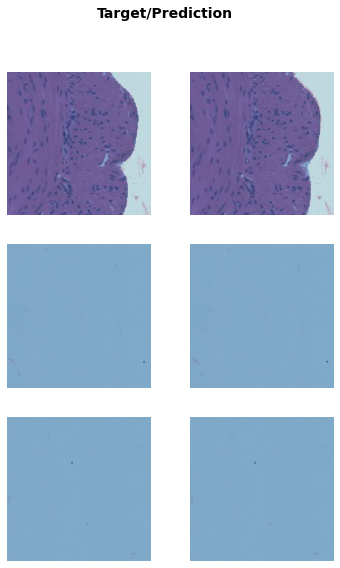

In [ ]:
learn.load('UNET-Resnet34-2')
learn.show_results()

The model is trained to output 224x224 masks for 3x224x224 images. Writing a loop to 

1.   Cut the images into 224x224x3 sections
2.   Get predictions for each section
3.   Stitch the predictions to form image sized masks
4.   Convert the masks to original mask image format

In [ ]:
learn.load('UNET-Resnet34-2')
shutil.rmtree('/content/gdrive/My Drive/competitions/AIRA/Predictions')
os.mkdir('/content/gdrive/My Drive/competitions/AIRA/Predictions')

for k in range(6):
  print('/content/gdrive/My Drive/competitions/AIRA/Images/'+str(k+1)+'.jpg')
  Image_1 = cv2.imread('/content/gdrive/My Drive/competitions/AIRA/Images/'+str(k+1)+'.jpg')
  Image_1 = cv2.cvtColor(Image_1, cv2.COLOR_BGR2RGB)
  print(Image_1.shape)
  Predicted_1 = np.zeros((896, 1906))

  #For Visual Inspection
  Predicted_1[Predicted_1 == 0] = 5

  for i in range(4):
    for j in range(8):
      Temp_Image = Image_1[224*i:224*(i+1), 224*j:224*(j+1)]
      Predicted_1[224*i:224*(i+1), 224*j:224*(j+1)] = learn.predict(Temp_Image)[0].numpy()

      if j == 7:
        Temp_Image = Image_1[224*i:224*(i+1), 1682:]
        Predicted_1[224*i:224*(i+1), -114:] = learn.predict(Temp_Image)[0].numpy()[:, -114:]

  Temp_Array_B = Predicted_1.copy()
  Temp_Array_B[Temp_Array_B == 0] = 28
  Temp_Array_B[Temp_Array_B == 1] = 39
  Temp_Array_B[Temp_Array_B == 2] = 110
  Temp_Array_B[Temp_Array_B == 3] = 163

  Temp_Array_G = Predicted_1.copy()
  Temp_Array_G[Temp_Array_G == 0] = 212
  Temp_Array_G[Temp_Array_G == 1] = 30
  Temp_Array_G[Temp_Array_G == 2] = 190
  Temp_Array_G[Temp_Array_G == 3] = 92

  Temp_Array_R = Predicted_1.copy()
  Temp_Array_R[Temp_Array_R == 0] = 224
  Temp_Array_R[Temp_Array_R == 1] = 234
  Temp_Array_R[Temp_Array_R == 2] = 101
  Temp_Array_R[Temp_Array_R == 3] = 24

  cv2.imwrite('/content/gdrive/My Drive/competitions/AIRA/Predictions/PredMask_'+str(k+1)+'.png', np.dstack((Temp_Array_B, Temp_Array_G, Temp_Array_R)))

/content/gdrive/My Drive/competitions/AIRA/Images/1.jpg
(896, 1906, 3)


/content/gdrive/My Drive/competitions/AIRA/Images/2.jpg
(896, 1906, 3)


/content/gdrive/My Drive/competitions/AIRA/Images/3.jpg
(896, 1906, 3)


/content/gdrive/My Drive/competitions/AIRA/Images/4.jpg
(896, 1906, 3)


/content/gdrive/My Drive/competitions/AIRA/Images/5.jpg
(896, 1906, 3)


/content/gdrive/My Drive/competitions/AIRA/Images/6.jpg
(896, 1906, 3)


Loading 1.jpg image's original and predicted mask for visual comparison

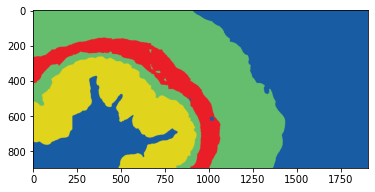

In [ ]:
plt.imshow(cv2.cvtColor(cv2.imread('/content/gdrive/My Drive/competitions/AIRA/Predictions/PredMask_1.png'), cv2.COLOR_BGR2RGB))

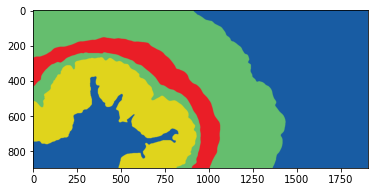

In [ ]:
plt.imshow(cv2.cvtColor(cv2.imread('/content/gdrive/My Drive/competitions/AIRA/Images/1_label.png'), cv2.COLOR_BGR2RGB))

# Performance

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

Overall_Accuracy = 0
Overall_Dice = 0

for k in range(6):
  
  Annotation_1 = cv2.imread('/content/gdrive/My Drive/competitions/AIRA/Images/'+str(k+1)+'_label.png')
  Annotation_1 = Annotation_1[:,:,0]
  Annotation_1[Annotation_1 == 28] = 0
  Annotation_1[Annotation_1 == 39] = 1
  Annotation_1[Annotation_1 == 110] = 2
  Annotation_1[Annotation_1 == 163] = 3

  Annotation_2 = cv2.imread('/content/gdrive/My Drive/competitions/AIRA/Predictions/PredMask_'+str(k+1)+'.png')
  Annotation_2 = Annotation_2[:,:,0]
  Annotation_2[Annotation_2 == 28] = 0
  Annotation_2[Annotation_2 == 39] = 1
  Annotation_2[Annotation_2 == 110] = 2
  Annotation_2[Annotation_2 == 163] = 3

  Dice=0
  for i in range(4):
    Intersection = (((Annotation_1==i)*1) * ((Annotation_2==i)*1)).sum()
    Union = (((Annotation_1==i)*1) + ((Annotation_2==i)*1)).sum()
    Dice += 2*Intersection/Union

  Overall_Accuracy += (Annotation_1 == Annotation_2).sum()/(896*1906)
  Overall_Dice += Dice/4

  print("\nAverage Dice Coefficient for {}.jpg is: \t{:2F}".format(k+1, Dice/4))
  print("Pixel Accuracy for {}.jpg is: \t\t{:2F}".format(k+1, (Annotation_1 == Annotation_2).sum()/(896*1906)))

print("\n\nAverage Dice Coefficient for all images is: \t{:2F}".format(Overall_Dice/(k+1)))
print("Pixel Accuracy for all images is: \t\t{:2F}".format(Overall_Accuracy/(k+1)))


Average Dice Coefficient for 1.jpg is: 	0.980364
Pixel Accuracy for 1.jpg is: 		0.984634

Average Dice Coefficient for 2.jpg is: 	0.985373
Pixel Accuracy for 2.jpg is: 		0.986721

Average Dice Coefficient for 3.jpg is: 	0.985202
Pixel Accuracy for 3.jpg is: 		0.985628

Average Dice Coefficient for 4.jpg is: 	0.988096
Pixel Accuracy for 4.jpg is: 		0.991029

Average Dice Coefficient for 5.jpg is: 	0.991384
Pixel Accuracy for 5.jpg is: 		0.991784

Average Dice Coefficient for 6.jpg is: 	0.987874
Pixel Accuracy for 6.jpg is: 		0.988852


Average Dice Coefficient for all images is: 	0.986382
Pixel Accuracy for all images is: 		0.988108


**Training Performance**

* Pixel Accuracy - 98.88%
* Dice Coefficient - 98.76%

**Validation Performance**

* Pixel Accuracy - 98.46%
* Dice Coefficient - 98.04%

Note - 

*Training Data - 2.jpg, 3.jpg, 4.jpg, 5.jpg, 6.jpg*

*Validation Data - 1.jpg*


## Further exploration - 

1. Larger models for encoder - ResNet50, EfficientNets
2. Hypercolumns
3. Ensembling
4. TTA
5. Loss Function - Dice Loss/IoU Loss